In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
school_award = pd.read_csv("schoolimprovement2010.csv")
school_award.head()

,School Name,City,State,District Name,2010/11/Award Amount,Model Selected,Location
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,471014.0,Transformation,"200 MAIN ST\nSAVOONGA, AK 99769\n(63.6687, -17..."
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,520579.0,Transformation,"AKIACHAK 51100\nAKIACHAK, AK 99551\n(60.8911, ..."
2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,449592.0,Transformation,"169 MAIN ST\nGAMBELL, AK 99742\n(63.7413, -171..."
3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,641184.0,Transformation,"1775 WEST PARKS HWY\nWASILLA, AK 99654\n(61.57..."
4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,399686.0,Transformation,"AKIAK 5227\nAKIAK, AK 99552\n(60.8879, -161.2)"


In [3]:
school_award.isnull().sum()

School Name              0
City                     0
State                    0
District Name            0
2010/11/Award Amount    74
Model Selected           6
Location                 0
dtype: int64

In [4]:
school_award = school_award.dropna(how="any")
school_award.isnull().sum()

School Name             0
City                    0
State                   0
District Name           0
2010/11/Award Amount    0
Model Selected          0
Location                0
dtype: int64

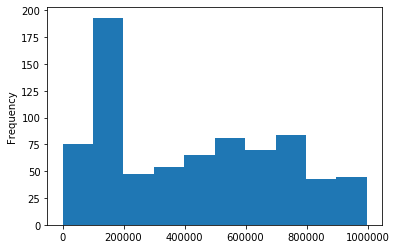

In [5]:
school_award["2010/11/Award Amount"].plot.hist()
plt.show()

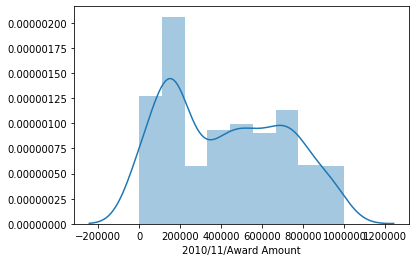

In [6]:
sns.distplot(school_award["2010/11/Award Amount"])
plt.show()

### kde and rug 

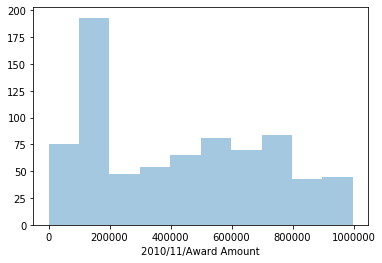

In [7]:
sns.distplot(school_award["2010/11/Award Amount"], bins=10, kde=False)
plt.show()

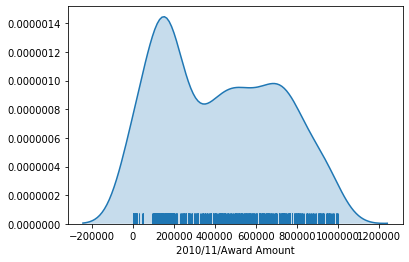

In [8]:
sns.distplot(
    school_award["2010/11/Award Amount"], hist=False, rug=True, kde_kws={"shade": True}
)
plt.show()

## Regression plots 

In [9]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


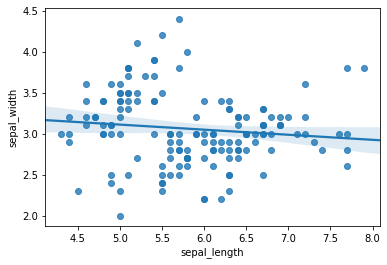

In [10]:
sns.regplot("sepal_length", "sepal_width", data=iris)
plt.show()

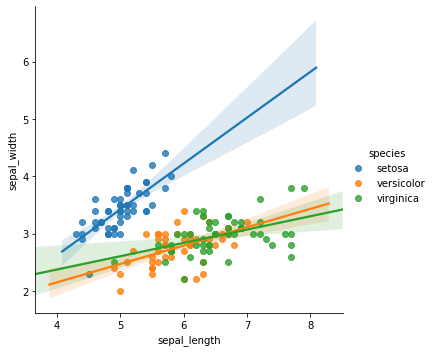

In [11]:
sns.lmplot("sepal_length", "sepal_width", data=iris, hue="species")
plt.show()

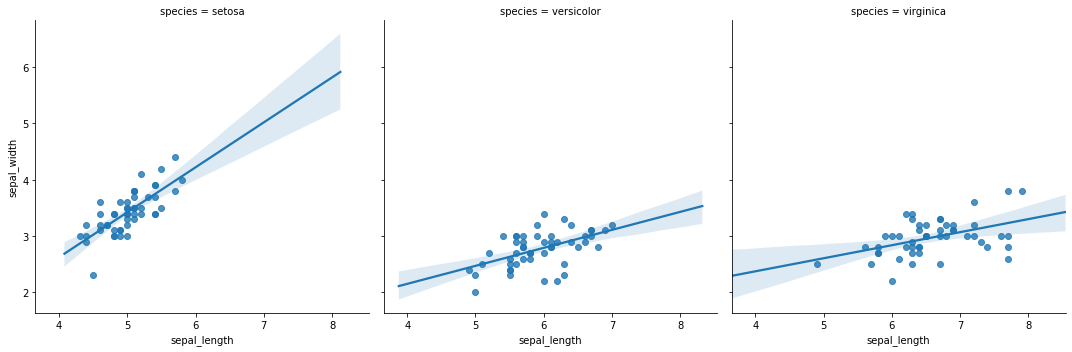

In [12]:
sns.lmplot("sepal_length", "sepal_width", data=iris, col="species")
plt.show()

## Seaborn styles 

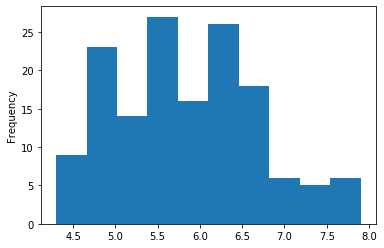

In [13]:
iris["sepal_length"].plot.hist()
plt.show()

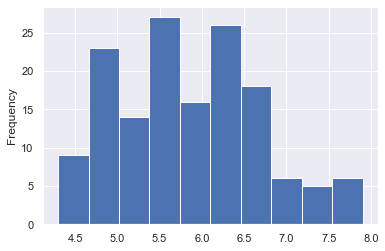

In [14]:
sns.set()  # default seaborn style
iris["sepal_length"].plot.hist()
plt.show()

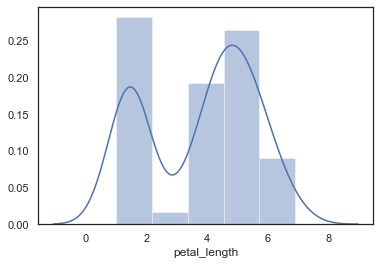

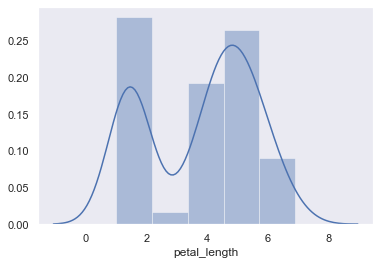

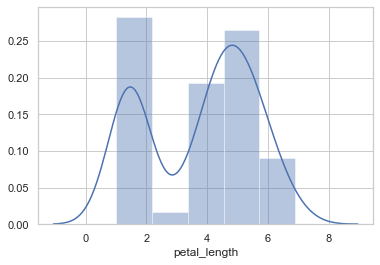

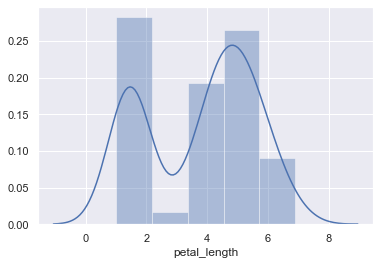

In [15]:
styles = ["white", "dark", "whitegrid", "darkgrid"]
for style in styles:
    sns.set_style(style)
    sns.distplot(iris["petal_length"])
    plt.show()

### Despine 

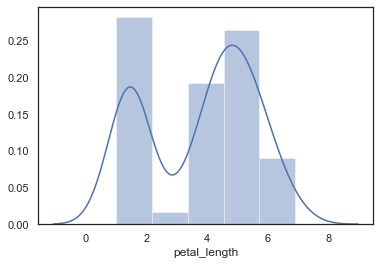

In [16]:
sns.set_style("white")
sns.distplot(iris["petal_length"])
plt.show()

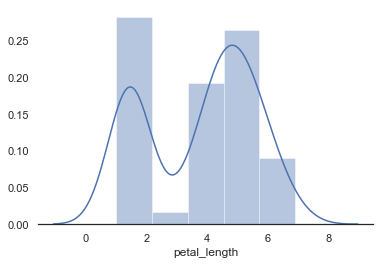

In [17]:
sns.set_style("white")
sns.distplot(iris["petal_length"])
sns.despine(left=True)
plt.show()

## Colors 

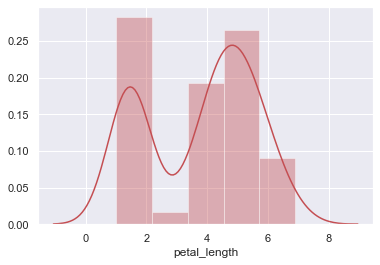

In [18]:
sns.set(color_codes=True)
sns.distplot(iris["petal_length"], color="r")
plt.show()

### Palettes 

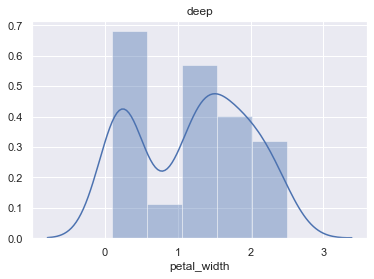

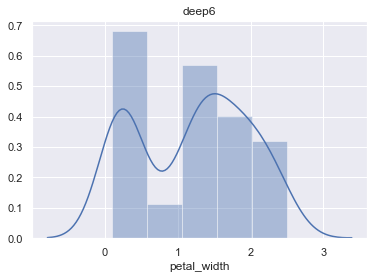

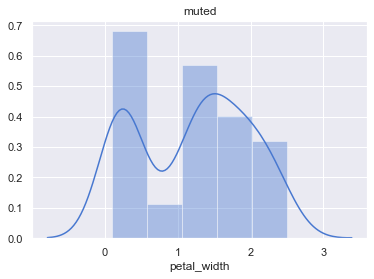

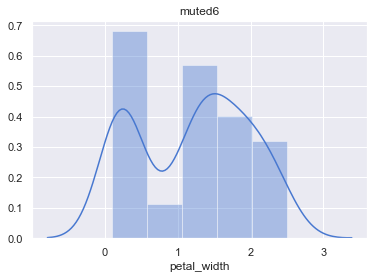

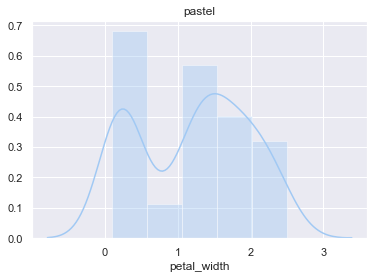

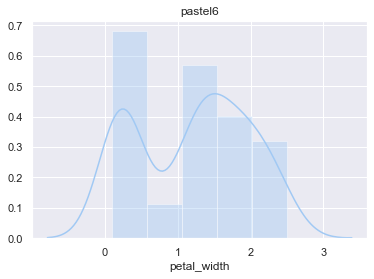

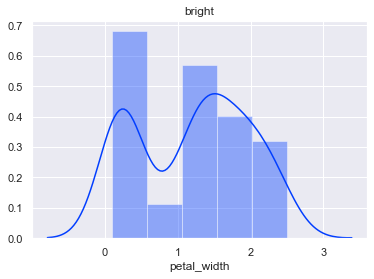

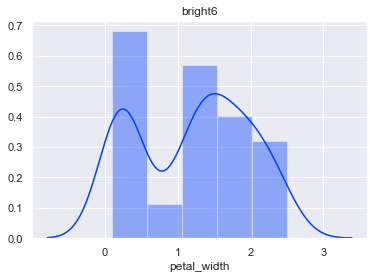

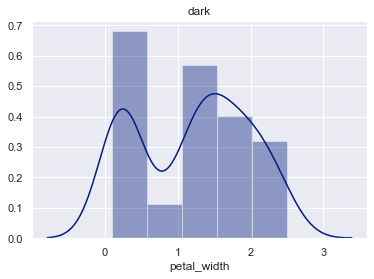

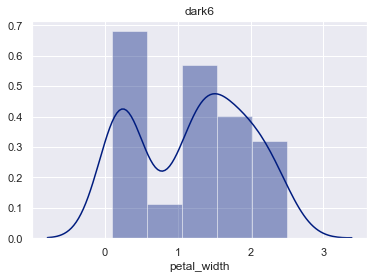

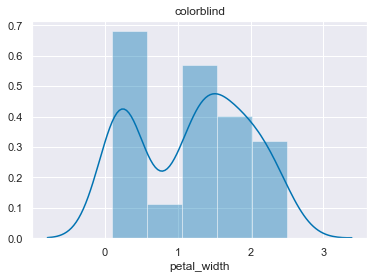

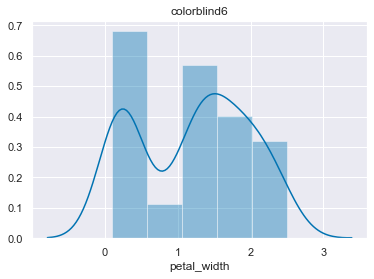

In [19]:
for x in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(x)
    sns.distplot(iris["petal_width"])
    plt.title(x)
    plt.show()

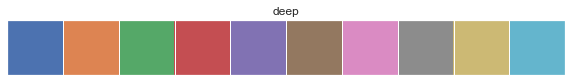

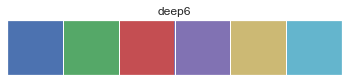

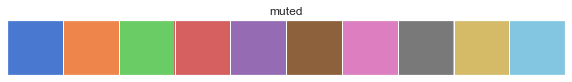

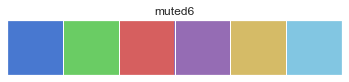

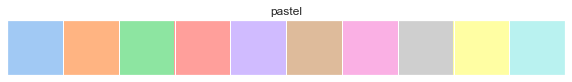

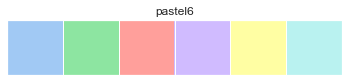

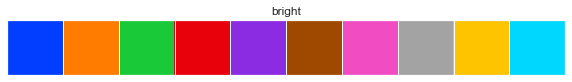

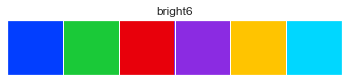

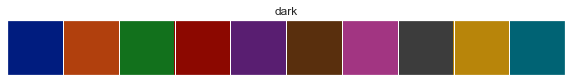

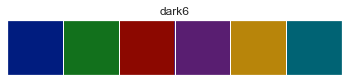

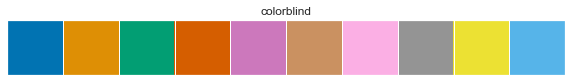

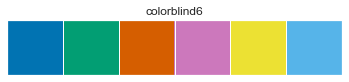

In [20]:
for x in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(x)
    sns.palplot(sns.color_palette())
    plt.title(x)
    plt.show()

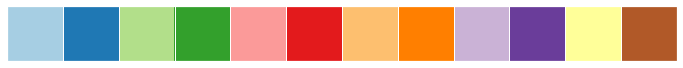

In [21]:
sns.palplot(
    sns.color_palette("Paired", 12)
)  # circular - when the data doesnt have an order
plt.show()

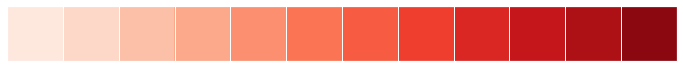

In [22]:
sns.palplot(
    sns.color_palette("Reds", 12)
)  # sequential - data has sequential order from high to low
plt.show()

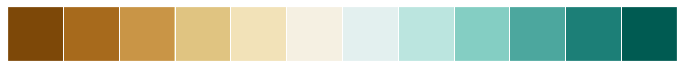

In [23]:
sns.palplot(
    sns.color_palette("BrBG", 12)
)  # diverging - both the high and low values are worth analyzing
plt.show()

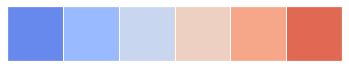

In [24]:
sns.palplot(sns.color_palette("coolwarm", 6))  # another example of diverging
plt.show()

## Customization 

In [25]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic = titanic.dropna(how="any")

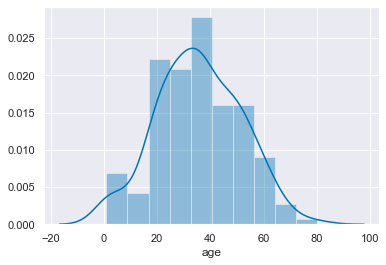

In [27]:
sns.distplot(titanic["age"])
plt.show()

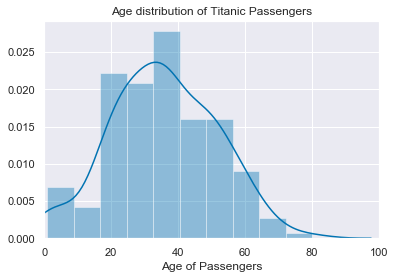

In [28]:
fig, ax = plt.subplots()
sns.distplot(titanic["age"], bins=10, ax=ax)
ax.set(
    xlabel="Age of Passengers",
    xlim=(0, 100),
    title="Age distribution of Titanic Passengers",
)
plt.show()

### Highlighting median and mean values 

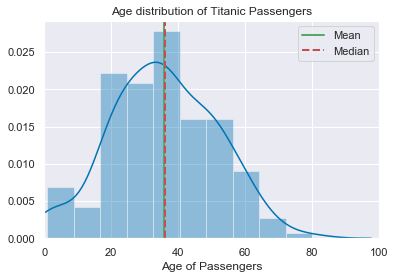

In [29]:
fig,ax = plt.subplots()
sns.distplot(titanic['age'],bins = 10, ax = ax)
ax.set(
    xlabel="Age of Passengers",
    xlim=(0, 100),
    title="Age distribution of Titanic Passengers",
)
ax.axvline(x = np.mean(titanic['age']), color = 'g', label = "Mean", linestyle = '-', linewidth = 2)
ax.axvline(x = np.median(titanic['age']), color = 'r', label = "Median", linestyle = '--', linewidth = 2)

ax.legend()
plt.show()

In [30]:
print(np.median(titanic['age']))
print(np.mean(titanic['age']))

36.0
35.62318681318681


The mean and median ages of all the passengers were similar.  

### Analyzing the ages and fare paid by those who Survived and those who didnt

In [32]:
survived = titanic[titanic['survived']==1]
died = titanic[titanic['survived']==0]

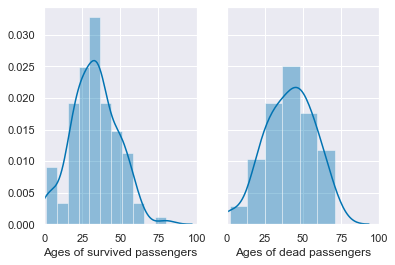

In [33]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.distplot(survived['age'],ax = ax0)
ax0.set(xlabel = 'Ages of survived passengers',xlim = (0,100))

sns.distplot(died['age'],ax = ax1)
ax1.set(xlabel = 'Ages of dead passengers',xlim = (0,100))

plt.show()

The kde curve for survived passengers peaks at around 30 yrs while that for dead passengers peaks at around 50 yrs. This shows that most of the survivors were younger as compared to those who died.

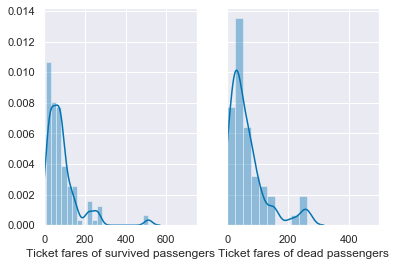

In [40]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.distplot(survived['fare'],ax = ax0)
ax0.set(xlabel = 'Ticket fares of survived passengers',xlim = (0,750))

sns.distplot(died['fare'],ax = ax1)
ax1.set(xlabel = 'Ticket fares of dead passengers',xlim = (0,500))

plt.show()

The x axis for the survived passengers shows higher values indicating that passengers who paid the most(first class) had a higher chance of survival. The third class passengers features the most in both graphs.